# Mid Bootcamp Project

## Set up

In [1]:
# importing the necesary packages
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# opening the file
df = pd.read_excel('regression_data.xls')

In [3]:
# getting information from the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## EDA

### A quick data check & cleanup

We saw that we have no nulls so we will look at all our numeric data to get an overall idea

In [5]:
# describing numericals
df.describe(include=np.number)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


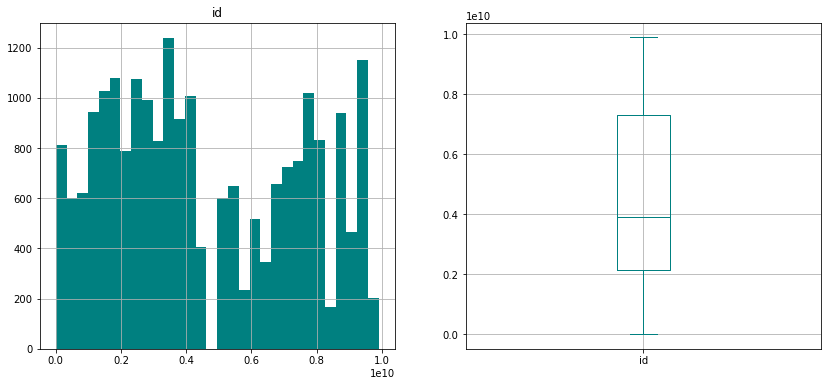

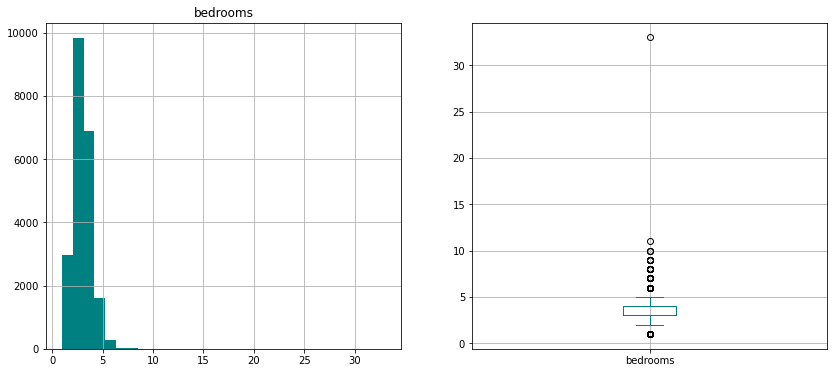

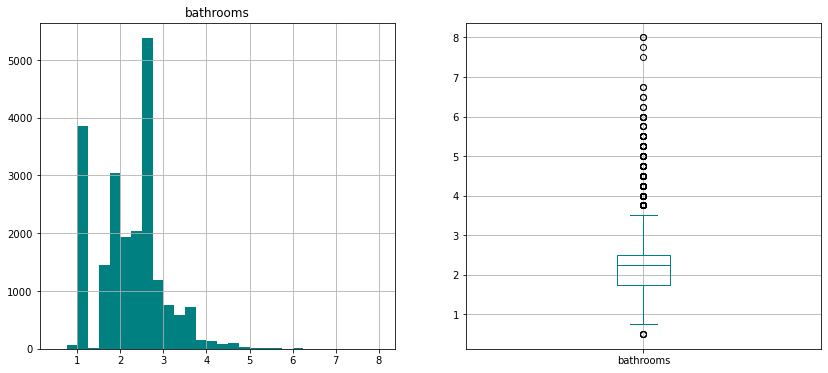

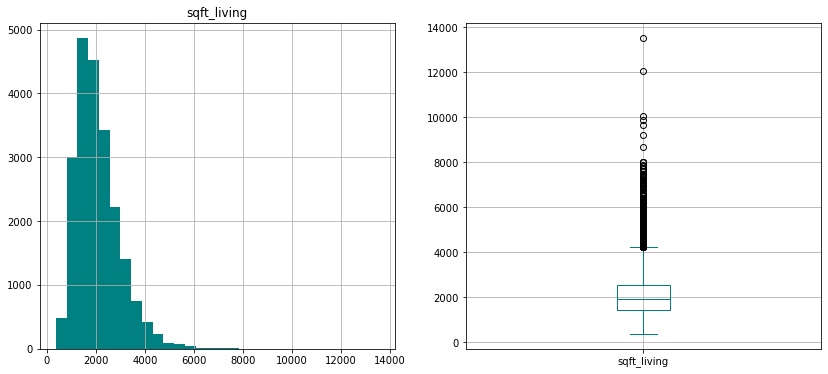

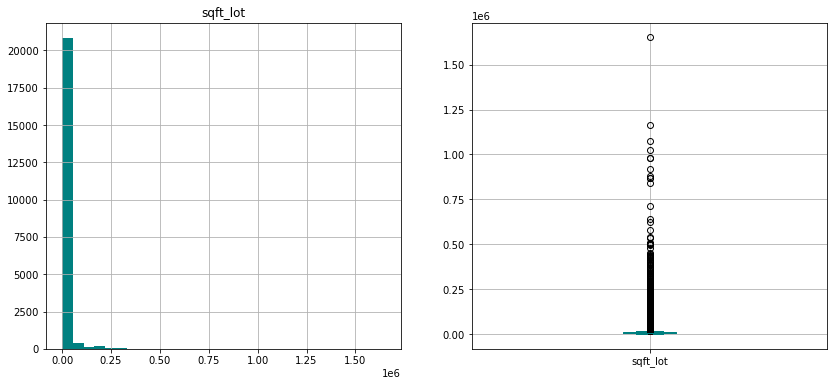

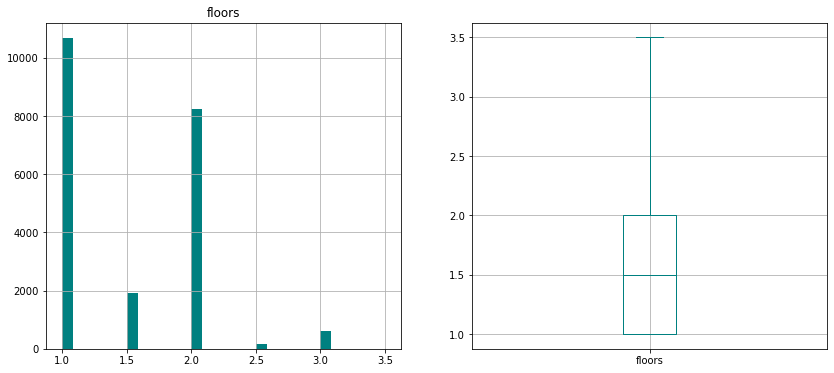

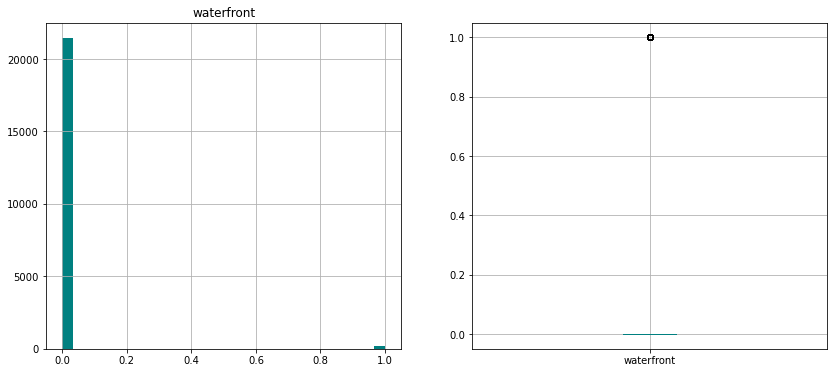

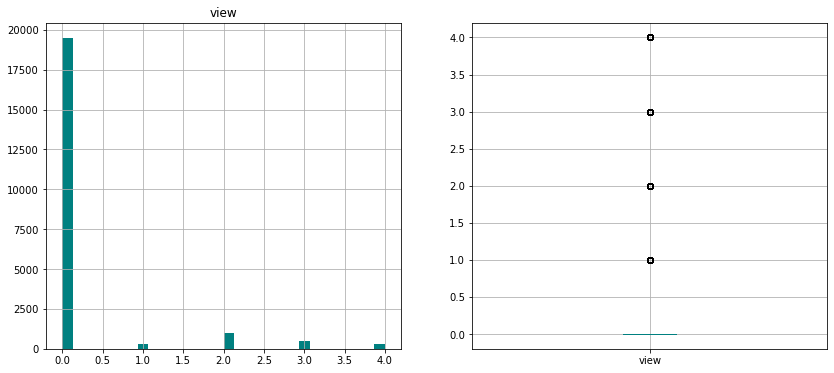

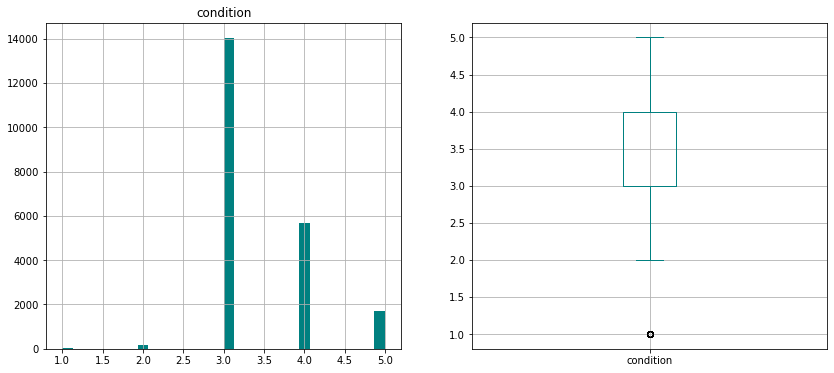

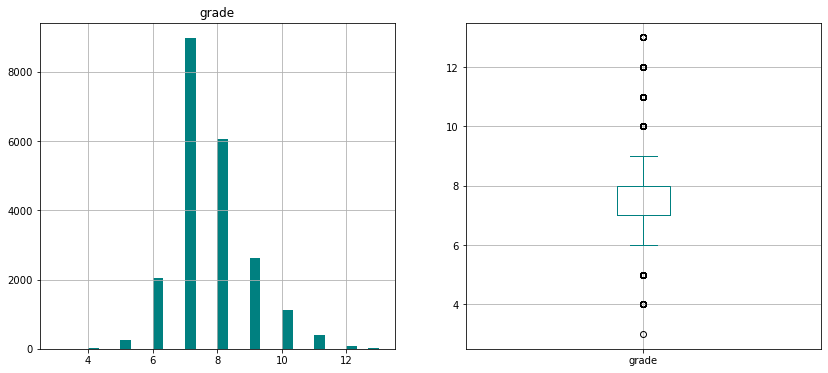

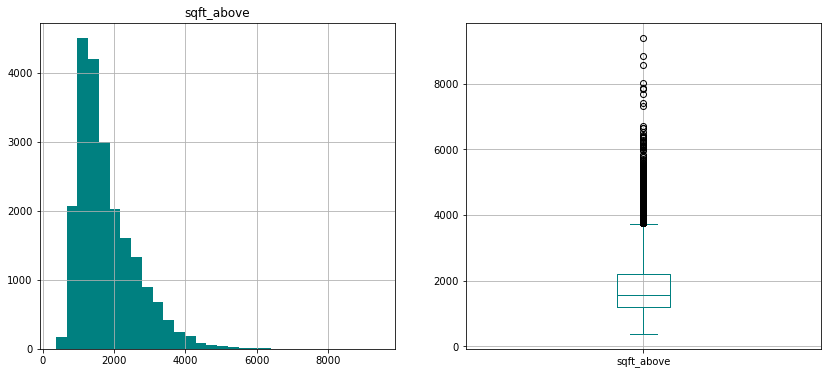

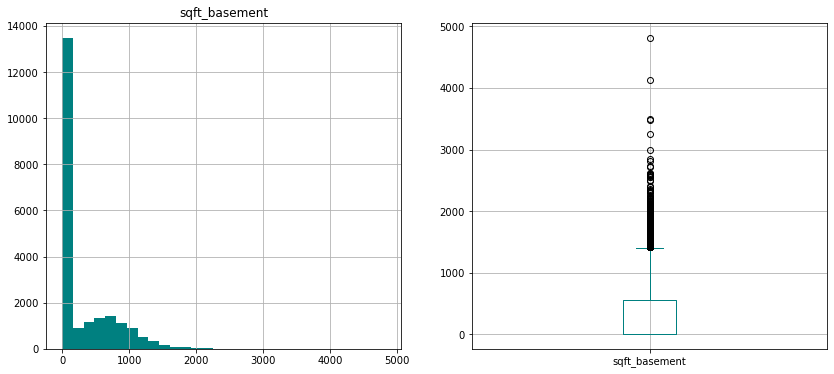

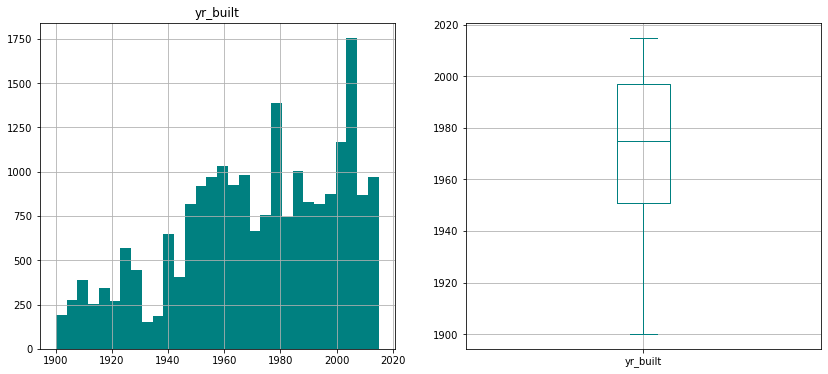

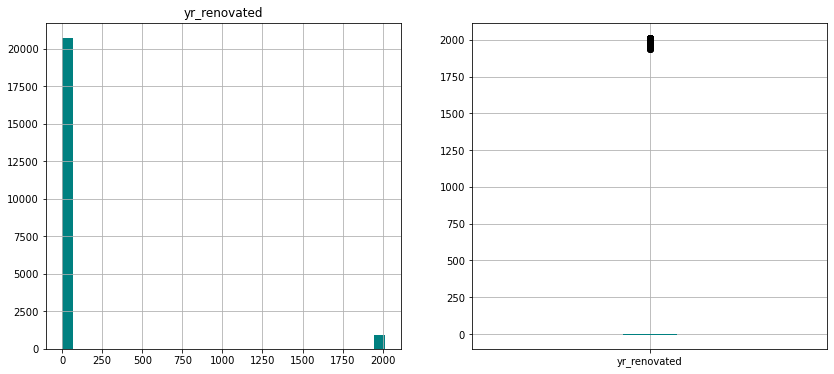

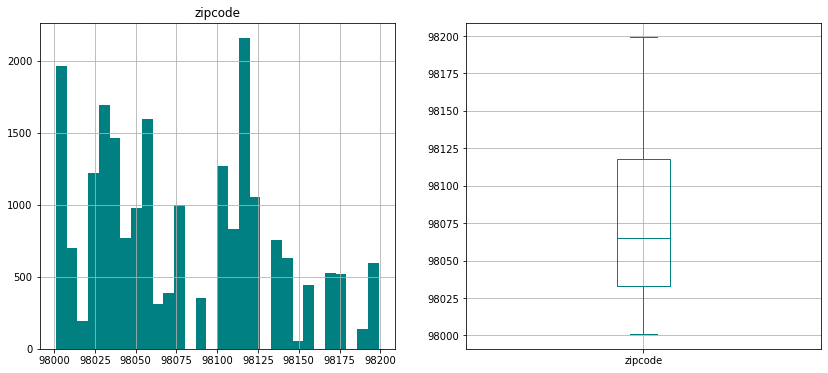

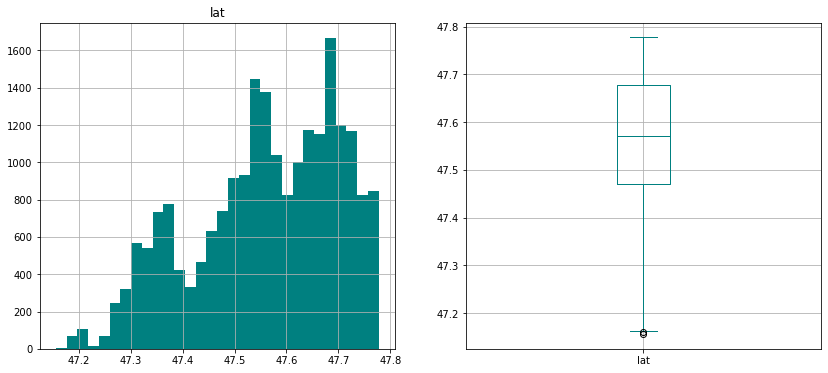

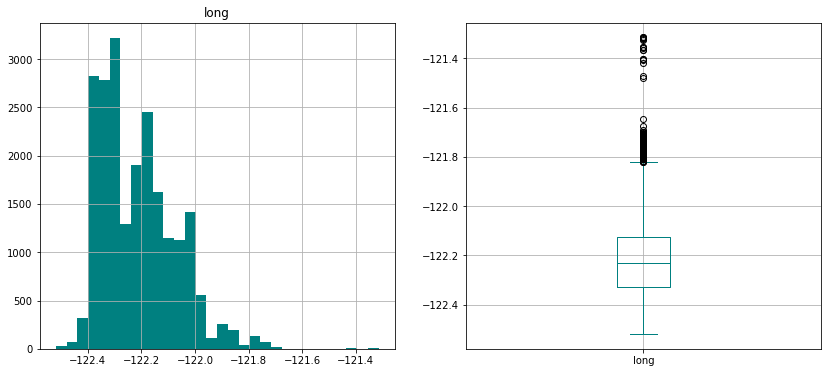

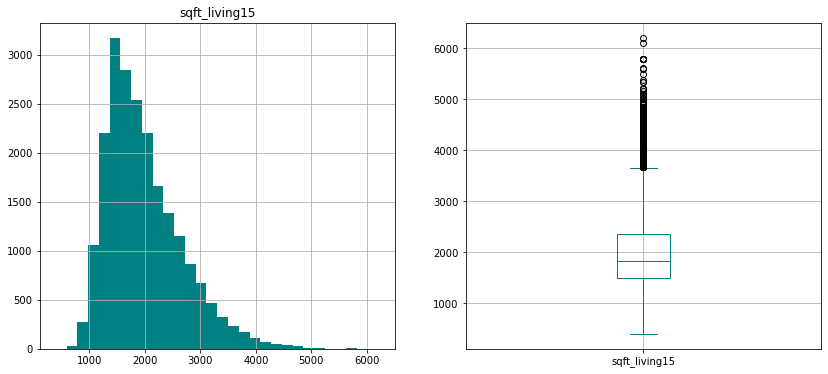

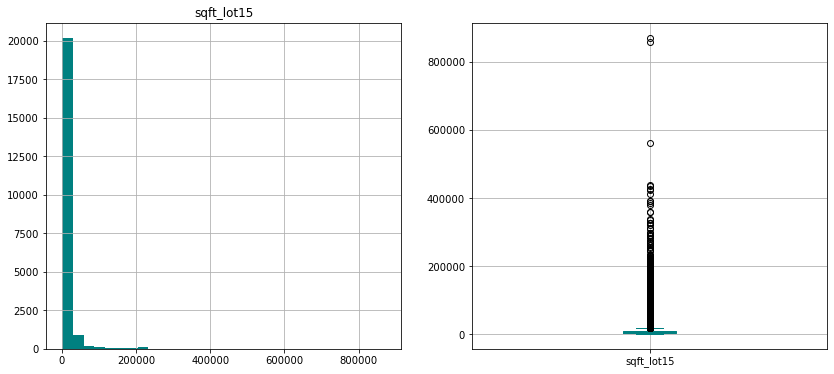

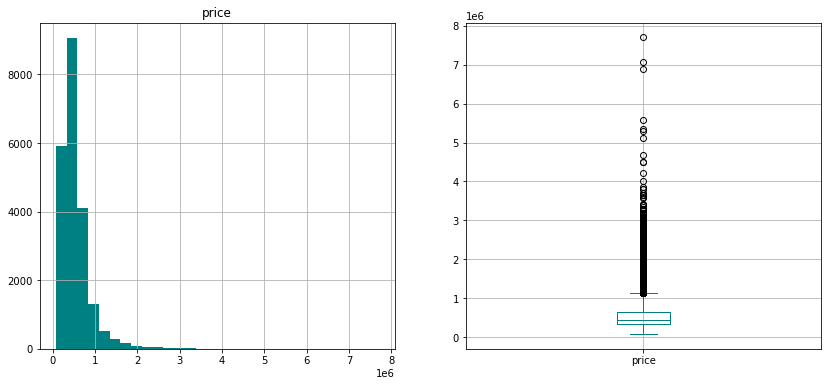

In [6]:
# plotting numericals
numdf = df.select_dtypes(include = np.number)
for column in numdf.columns:
    # 2 charts
    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    # histogram
    numdf[column].hist(bins = 30, ax = axes[0], color = 'teal')
    axes[0].set_title(column)
    # boxplot 
    numdf.boxplot(column = column, ax = axes[1], color = 'teal')
    plt.show()

#### ID

We will now check some of the columns to seek for 'weird' numbers

In [7]:
# checking id
df.id.value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [8]:
# we have some duplicated ID's, checking one for reference
df.loc[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


 Apparently in the duplicated ID's the price changes with the date so we are keeping it for better accuracy of the model but we are dropping the column anyway

In [9]:
df.drop(['id'], axis = 1, inplace = True) 

#### Bedrooms

In [10]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
# 33 bedrooms? might be an error
# check the row
df.loc[df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


Since we are not sure if it's a typo and leaving it will make a big difference on our data we decided to drop it

In [12]:
df.drop(df.index[15856])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


#### Bathrooms

In [13]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Floors

In [14]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

#### Waterfront

In [15]:
df.waterfront.value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

#### SQFT Living & SQFT Living 15

In [16]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [17]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

For better accuracy and less data we decided to drop `sqft_living` & `sqft_lot`, giving that we have updated sizes on another column (`sqft_living15` & `sqft_lot15`)

In [18]:
df.drop(['sqft_living', 'sqft_lot'], axis = 1, inplace = True) 

In [19]:
# reindexing
df.reset_index(drop=True, inplace=True)

In [20]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Years Built & Renovated

In [21]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We won't be able to work with the zeroes in the `yr_renovated` and they are a majority so we decided to drop it

In [22]:
df.drop(['yr_renovated'], axis = 1, inplace = True)

The year built is actually a date, we decided to turn it into a regular number by obtaining the age of the house (based on 2015 as end date)

In [23]:
# creating new age column
dfnew = pd.DataFrame(2015 - df["yr_built"])
dfnew

,yr_built
0,60
1,64
2,82
3,50
4,28
...,...
21592,6
21593,1
21594,6
21595,11


In [24]:
# renaming column in new dataframe
dfnew.rename(columns={'yr_built': 'house_age'}, inplace=True) 
# joining dataframes
df = pd.concat([df, dfnew], axis=1)
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000,28


In [25]:
# droping the column
df.drop(['yr_built'], axis = 1, inplace = True) 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   floors         21597 non-null  float64       
 4   waterfront     21597 non-null  int64         
 5   view           21597 non-null  int64         
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   sqft_above     21597 non-null  int64         
 9   sqft_basement  21597 non-null  int64         
 10  zipcode        21597 non-null  int64         
 11  lat            21597 non-null  float64       
 12  long           21597 non-null  float64       
 13  sqft_living15  21597 non-null  int64         
 14  sqft_lot15     21597 non-null  int64         
 15  price          2159

#### LAT, LONG, ZIPCODE

Too many columns for the same information, we will drop `lat` and `long` and keep `zipcode`.

In [27]:
df = df.drop(['lat', 'long'], axis=1)

#### DATE

We don't consider it really necessary for our predictions and turning it into numbers doesn't seem really useful, so we are dropping the column

In [28]:
df.drop(['date'], axis = 1, inplace = True) 

In [29]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Grade

In [30]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

According to google, the grade 1-3:  'Falls short of minimum building standards. Normally cabin or inferior structure.'


In [31]:
# checking and removing the grade
df.loc[df['grade'] == 3]

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_age
3220,1,0.75,1.0,0,0,5,3,520,0,98022,1340,12233,262000,95


In [32]:
df.drop(df.index[3220])

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_age
0,3,1.00,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,64
2,2,1.00,1.0,0,0,3,6,770,0,98028,2720,8062,180000,82
3,4,3.00,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,50
4,3,2.00,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,98103,1530,1509,360000,6
21593,4,2.50,2.0,0,0,3,8,2310,0,98146,1830,7200,400000,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,1020,2007,402101,6
21595,3,2.50,2.0,0,0,3,8,1600,0,98027,1410,1287,400000,11


In [33]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Categorical columns

We decided to turn some columns into categoricals to be able to manage them differently from the rest of the data `bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition` and `grade`. 

In [34]:
# changing the selected columns to object type
df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']] = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']].astype(object)

In [35]:
# checking that the type change is done
df.dtypes

bedrooms         object
bathrooms        object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above        int64
sqft_basement     int64
zipcode           int64
sqft_living15     int64
sqft_lot15        int64
price             int64
house_age         int64
dtype: object

## Correlations

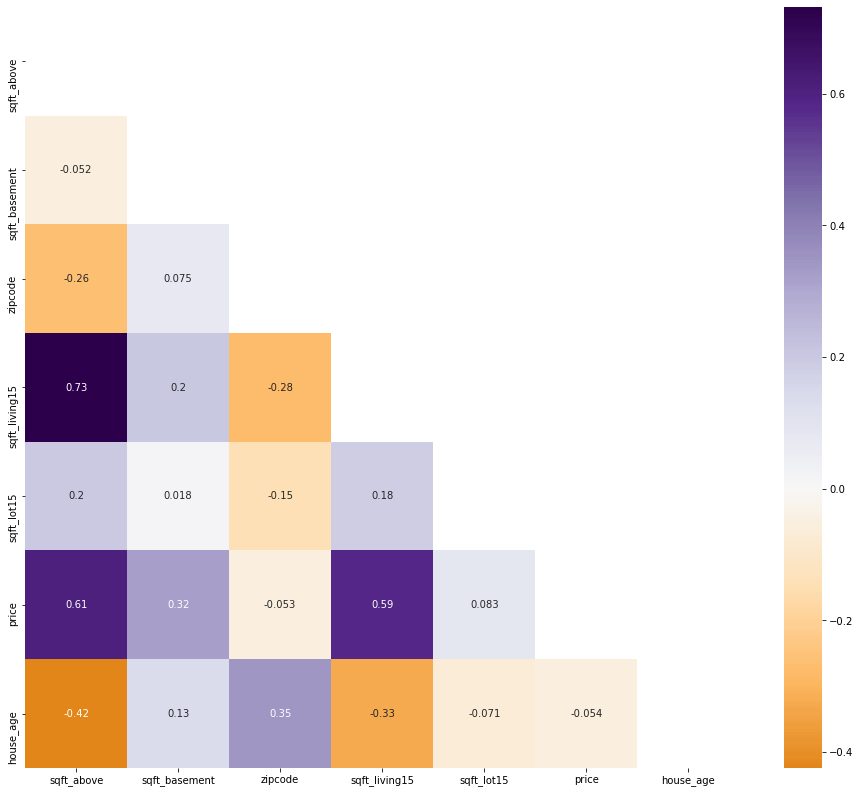

In [36]:
# checking correlations
corr_matrix = df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(df.corr(),
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'PuOr')
plt.show();

High correlations between features: first model might not be as accurate, maybe drop some features in the next try but for now we will use them all

#### Quick scatter check of columns for future comparison

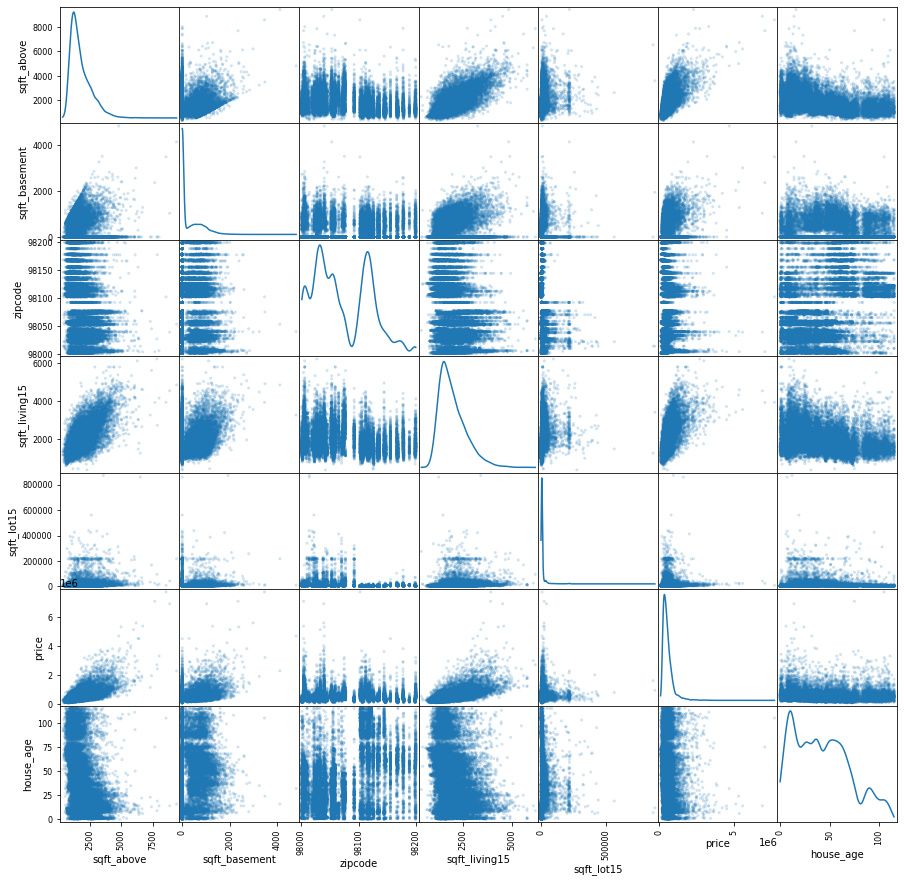

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15,15), diagonal="kde");

In [38]:
#copying and saving the cleaned dataframe to be able to use it later
cleaneddf = df.copy()
df.to_csv("cleaned_regression_data.csv", index=False)

## Modelling

In [39]:
# getting the packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

### First Try: without data processing. Linear regression & KNN

#### Defining X & y

In [40]:
X = cleaneddf.drop(columns=['price'])

In [41]:
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age
0,3,1.0,1.0,0,0,3,7,1180,0,98178,1340,5650,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,64
2,2,1.0,1.0,0,0,3,6,770,0,98028,2720,8062,82
3,4,3.0,1.0,0,0,5,7,1050,910,98136,1360,5000,50
4,3,2.0,1.0,0,0,3,8,1680,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,3,8,1530,0,98103,1530,1509,6
21593,4,2.5,2.0,0,0,3,8,2310,0,98146,1830,7200,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,1020,2007,6
21595,3,2.5,2.0,0,0,3,8,1600,0,98027,1410,1287,11


In [42]:
y = cleaneddf['price']

In [43]:
X.shape

(21597, 13)

In [44]:
y.shape

(21597,)

#### Split data intro train & test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [47]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [48]:
R2 = r2_score(y_test,predictions)
R2

0.6562731494899455

In [49]:
MSE = mean_squared_error(y_test,predictions)
MSE

46887051959.96079

In [50]:
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

216534.1819666373

In [51]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions)
MAE

139494.2294784057

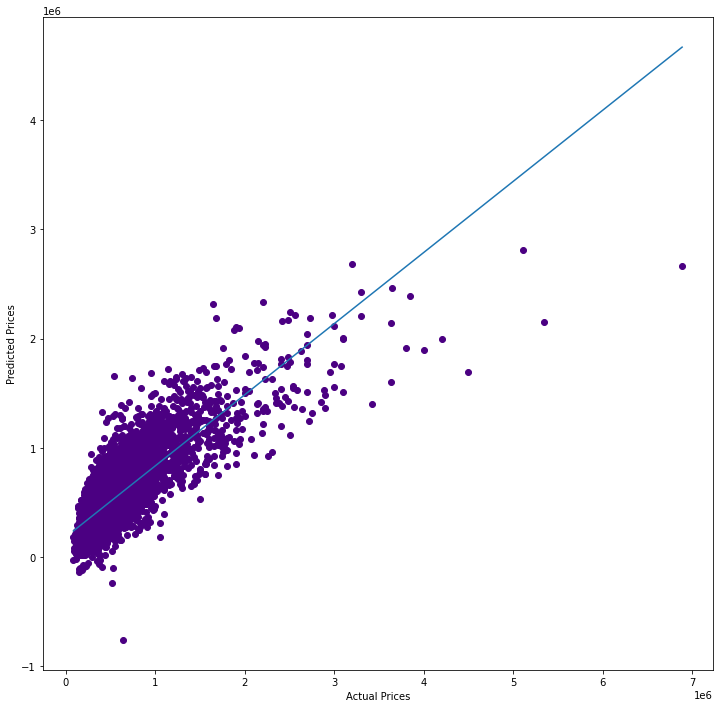

In [52]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="indigo")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

First approach: with poorly cleaned data and no preprocessing we managed an accuracy of 65% and a mean absolute error of $139.494, we will try to improve the accuracy now by processing the data and maybe do some more cleaning and trying different models

#### KNN

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [55]:
R2 = r2_score(y_test,predictions)
R2

0.5453558319878258

In [56]:
MSE = mean_squared_error(y_test,predictions)
MSE

62017048412.85423

In [57]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

249032.2236435563

In [58]:
MAE = mean_absolute_error(y_test, predictions)
MAE

150048.65207199904

KNN is not the fittest model so far, linear regression is more accurate so far

### Second Try: StandardScaler & OneHotEncoder. Linear regression & KNN 

#### StandardScaler

In [59]:
# getting the numerical columns
numericals = df._get_numeric_data()
Xnum = numericals.drop(columns=['price'])

In [60]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.73525069, -0.65903091,  1.86964543, -0.94367562, -0.26062671,
         0.54467809],
       [ 0.46077619,  0.24460216,  0.87921029, -0.43288674, -0.18769961,
         0.68085037],
       [-1.23057495, -0.65903091, -0.93347288,  1.07029196, -0.17219022,
         1.29362563],
       ...,
       [-0.92854796, -0.65903091,  1.23427195, -1.41068259, -0.39419807,
        -1.29364769],
       [-0.22784535, -0.65903091, -0.95216033, -0.84151784, -0.42059702,
        -1.12343234],
       [-0.92854796, -0.65903091,  1.23427195, -1.41068259, -0.41803046,
        -1.25960462]])

#### GetDummies

In [61]:
# using categorical columns
Xcat = df.select_dtypes(include = object)

In [62]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [63]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [64]:
y = df['price']

In [65]:
X.shape

(21597, 69)

In [66]:
y.shape

(21597,)

#### Split data intro train and test


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [69]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [70]:
R2 = r2_score(y_test,predictions)
R2

0.6948622519524283

In [71]:
MSE = mean_squared_error(y_test,predictions)
MSE

41623194191.614136

In [72]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

204017.63206059946

In [73]:
MAE = mean_absolute_error(y_test, predictions)
MAE

132342.2925235878

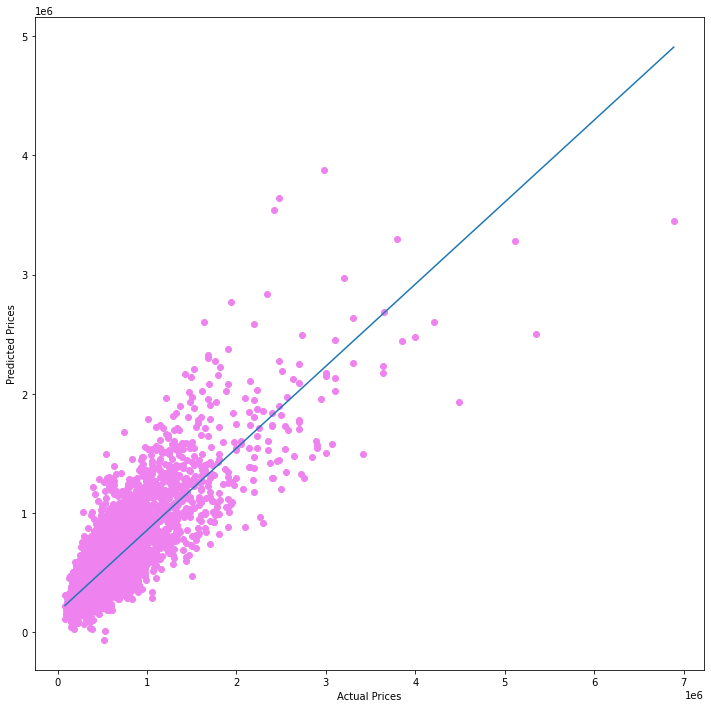

In [74]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="violet")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

We didn't get much of a difference but still we managed to improve the model a little by getting now a 69% accuracy and a mean error of $132,342, we are getting there.

#### KNN

In [75]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [76]:
R2 = r2_score(y_test,predictions)
R2

0.6490883936034404

In [77]:
MSE = mean_squared_error(y_test,predictions)
MSE

47867109299.29963

In [78]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

218785.53265538294

In [79]:
MAE = mean_absolute_error(y_test, predictions)
MAE

124945.24343095266

Our KNN model is worst than the linear one but it has improved from the previous run that gave us a 54%

### Third Try: without outliers. Linear regression & KNN 

With the aim of trying to get a more accurate prediction we decided to drop outliers

In [80]:
# found this nice little code with the help of our friend google
def get_outliers(df, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = df[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = df[(df[col] > mean + 3*sd) | (df[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [81]:
df_outliers = get_outliers(df, df)

In [82]:
df_outliers

[5,
 8201,
 10,
 15,
 16399,
 16404,
 21,
 8215,
 8217,
 16416,
 36,
 16424,
 41,
 16429,
 49,
 16434,
 8247,
 58,
 60,
 8259,
 70,
 8270,
 16474,
 98,
 114,
 8312,
 8318,
 16511,
 16510,
 8321,
 8322,
 16513,
 16516,
 8337,
 147,
 153,
 8355,
 16553,
 16556,
 16566,
 185,
 8379,
 16574,
 8402,
 216,
 16600,
 218,
 16610,
 230,
 238,
 239,
 8436,
 246,
 8438,
 8443,
 16635,
 264,
 269,
 270,
 8462,
 8467,
 16660,
 282,
 8478,
 294,
 300,
 8495,
 312,
 313,
 314,
 8507,
 16706,
 8514,
 16715,
 8527,
 8528,
 16722,
 8535,
 8537,
 350,
 8547,
 8549,
 8559,
 16759,
 380,
 16767,
 384,
 16768,
 8580,
 8588,
 397,
 16789,
 16790,
 409,
 411,
 416,
 8610,
 16803,
 419,
 8614,
 8615,
 16811,
 8620,
 8619,
 8629,
 16823,
 443,
 16830,
 450,
 16834,
 8646,
 457,
 8655,
 16848,
 465,
 8660,
 473,
 8671,
 16863,
 484,
 8683,
 16879,
 8698,
 512,
 16897,
 16900,
 518,
 519,
 527,
 532,
 16917,
 540,
 16928,
 16930,
 551,
 555,
 556,
 8748,
 561,
 8755,
 8756,
 16955,
 8763,
 575,
 577,
 582,
 8775,

In [83]:
newdf = df.drop(df_outliers, axis = 0)

In [84]:
# reindexing
newdf.reset_index(drop=True, inplace=True)

In [85]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19736 entries, 0 to 19735
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       19736 non-null  object
 1   bathrooms      19736 non-null  object
 2   floors         19736 non-null  object
 3   waterfront     19736 non-null  object
 4   view           19736 non-null  object
 5   condition      19736 non-null  object
 6   grade          19736 non-null  object
 7   sqft_above     19736 non-null  int64 
 8   sqft_basement  19736 non-null  int64 
 9   zipcode        19736 non-null  int64 
 10  sqft_living15  19736 non-null  int64 
 11  sqft_lot15     19736 non-null  int64 
 12  price          19736 non-null  int64 
 13  house_age      19736 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.1+ MB


#### StandardScaler

In [86]:
# getting the numerical columns
numericals = newdf._get_numeric_data()
Xnum = numericals.drop(columns=['price'])

In [87]:
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.7314083 , -0.66098334,  1.86923127, -0.94696813, -0.38348353,
         0.5357764 ],
       [ 0.66536096,  0.36634968,  0.87327226, -0.3613401 , -0.17896593,
         0.67192675],
       [-1.3098683 , -0.66098334, -0.94952063,  1.36207951, -0.13547124,
         1.28460333],
       ...,
       [-0.95714879, -0.66098334,  1.23031417, -1.48239946, -0.75807258,
        -1.30225335],
       [-0.13883952, -0.66098334, -0.96831231, -0.82984252, -0.8321061 ,
        -1.13206541],
       [-0.95714879, -0.66098334,  1.23031417, -1.48239946, -0.82490839,
        -1.26821576]])

#### GetDummies

In [88]:
# using categorical columns
Xcat = newdf.select_dtypes(include = object)

In [89]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [90]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [91]:
y = newdf['price']

In [92]:
y.shape

(19736,)

In [93]:
X.shape

(19736, 41)

#### Splitting data

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear regression

In [95]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [96]:
R2 = r2_score(y_test,predictions)
R2

0.596455827216015

In [97]:
MSE = mean_squared_error(y_test,predictions)
MSE

22163376277.737366

In [98]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

148873.6923628126

In [99]:
MAE = mean_absolute_error(y_test, predictions)
MAE

111230.9625956594

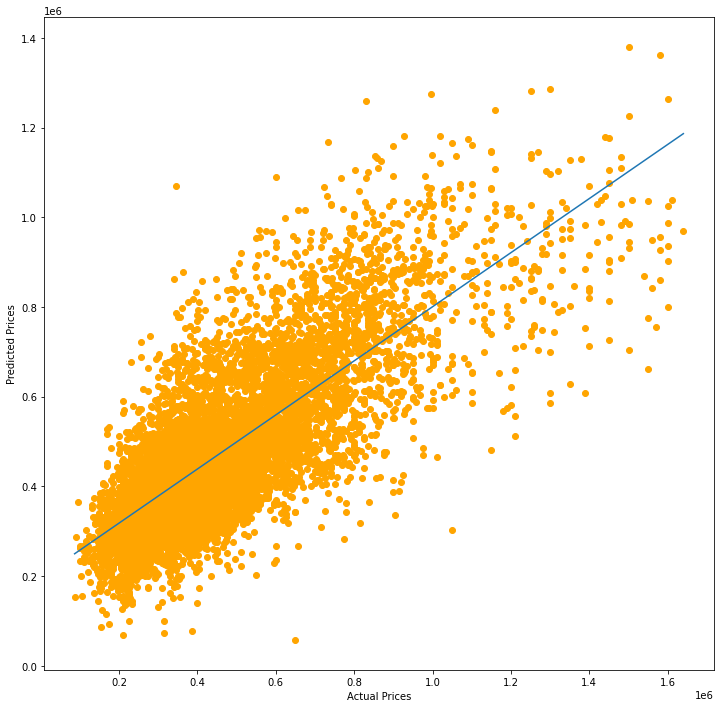

In [100]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="orange")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

Even by dropping outliers our accuracy is lower than the original run, we will try cleaning highly correlated fields out of this new data

#### KNN

In [101]:
knn_model = KNeighborsRegressor(n_neighbors= 11) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [102]:
R2 = r2_score(y_test,predictions)
R2

0.6154966666007698

In [103]:
MSE = mean_squared_error(y_test,predictions)
MSE

21117618919.833

In [104]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

145319.02463143977

In [105]:
MAE = mean_absolute_error(y_test, predictions)
MAE

104373.82474523575

Our KNN in this case has a slightly better accuracy than the linear regression model, 61% against 59%

### Fourth Try: less data, more accuracy?

We will do some try outs with only a few columns that we consider relevant to see if with less information we namage to get more accuracy

In [106]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_age
0,3,1.0,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,64
2,2,1.0,1.0,0,0,3,6,770,0,98028,2720,8062,180000,82
3,4,3.0,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,50
4,3,2.0,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,28


We will run 3 different options (all including `price` obviously), using: `bedrooms` & `sqft_lot15` / `floors`, `condition`& `zipcode` /  `bedrooms`, `zipcode`& `sqft_lot15`

#### `floors`, `condition` & `zipcode`

In [241]:
fourthdf = df.copy()

In [242]:
fourthdf.drop(['waterfront', 'sqft_above', 'sqft_basement', 'condition',
                  'zipcode', 'grade', 'sqft_living15', 'bedrooms', 'bathrooms'], axis = 1, inplace = True)

In [243]:
fourthdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   floors      21597 non-null  object
 1   view        21597 non-null  object
 2   sqft_lot15  21597 non-null  int64 
 3   price       21597 non-null  int64 
 4   house_age   21597 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 843.8+ KB


#### GetDummies

In [244]:
# using categorical columns
Xcat = fourthdf.select_dtypes(include = object)

In [245]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### All numericals

In [205]:
# bedsqftdzip[['bedrooms', 
             'floors', 
             'condition', 
             'grade']] = df[['bedrooms', 
             'floors', 
             'condition', 
             'grade']].astype(object)

IndentationError: unexpected indent (1897366887.py, line 2)

#### StandardScaler

In [246]:
numericals = fourthdf._get_numeric_data()
Xnum = numericals.drop(columns=['price'])
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.26062671,  0.54467809],
       [-0.18769961,  0.68085037],
       [-0.17219022,  1.29362563],
       ...,
       [-0.39419807, -1.29364769],
       [-0.42059702, -1.12343234],
       [-0.41803046, -1.25960462]])

#### X & y

In [247]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [248]:
y = fourthdf['price']

In [249]:
y.shape

(21597,)

In [250]:
X.shape

(21597, 11)

#### Splitting data

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear regression

In [252]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)

In [253]:
R2 = r2_score(y_test,predictions)
R2

0.26068537430224736

In [254]:
MSE = mean_squared_error(y_test,predictions)
MSE

100848342858.32295

In [255]:
RMSE = sqrt(mean_squared_error(y_test, predictions))
RMSE

317566.28104747355

In [256]:
MAE = mean_absolute_error(y_test, predictions)
MAE

203591.15967229617

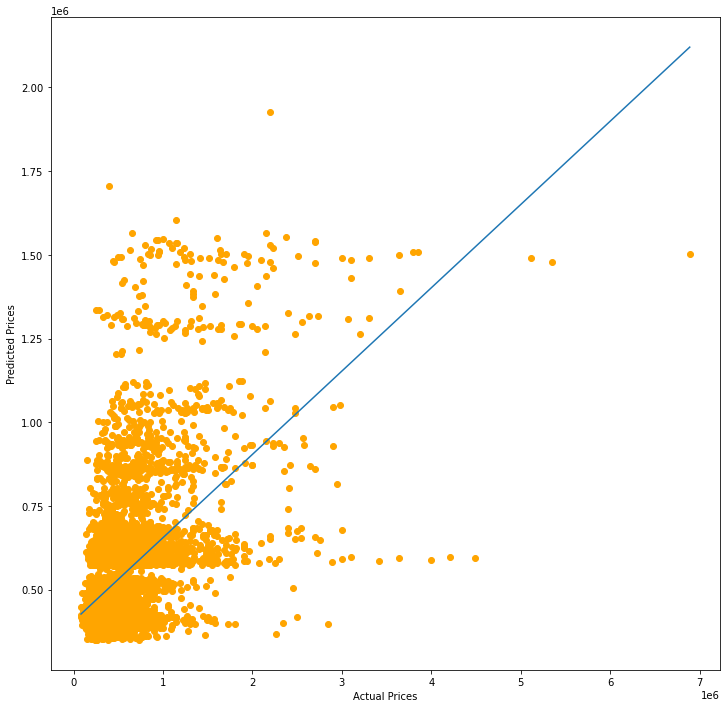

In [257]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="orange")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

#### KNN

In [258]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)

In [259]:
R2 = r2_score(y_test,predictions)
R2

0.3732975777238243